In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(image=None, title="", size=10,  axis=False, cmap=None):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w / h
  plt.figure(figsize=(size * aspect_ratio, size))
  plt.imshow(image, cmap=cmap)
  plt.title(title)
  plt.axis(axis)
  plt.show()

##**1.Load data**
```tf.keras.datasets()```

https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [3]:
MNIST = tf.keras.datasets.mnist
(X_train, y_train), (X_dev, y_dev) = MNIST.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##**2.Check datasets**

In [4]:
print(f"Number of Train data: {len(X_train)}")
print(f"Number of Devset data:{len(X_dev)}")
print(f"Dimention of Train/Dev features: {X_train.shape}")
print(f"Feature images Type: {X_train[0].dtype}")
print(f"Max and Min value of feature images: {np.max(X_train[0])}, {np.min(X_train[0])}")

Number of Train data: 60000
Number of Devset data:10000
Dimention of Train/Dev features: (60000, 28, 28)
Feature images Type: uint8
Max and Min value of feature images: 255, 0


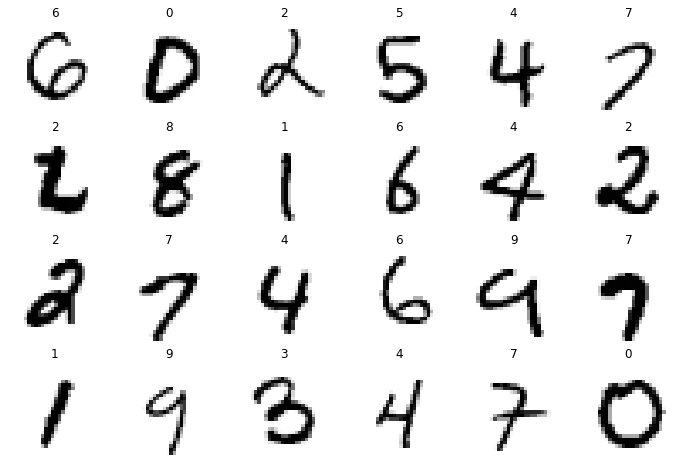

In [5]:
fig = plt.figure(figsize=(12, 8))
rows, cols = 4, 6
for i in range(1, rows*cols+1):
  idx = np.random.randint(0, len(X_train))
  fig.add_subplot(rows, cols, i)
  plt.imshow(X_train[idx], cmap='gray_r')
  plt.title(y_train[idx])
  plt.axis(False)

##**3.Preprocess Data**
- datasets dtype is np.uint --> convert to np.float32 or 64
- tensorflow input is: (batch, width, height, channel), MNIST dataset is grayscale image so we must add dimention to last axis
- Normilize data, divid by max of the dataset then the range of data will be [-1, 1]


###**Preprocess manualy**

In [6]:
X_train = X_train.astype(np.float32).reshape(-1, 28, 28, 1) / 255.
X_dev = X_dev.astype(np.float32).reshape(-1, 28, 28, 1) / 255.

In [7]:
print("After preprocessing:\n----------")
print(f"Number of Train data: {len(X_train)}")
print(f"Number of Devset data:{len(X_dev)}")
print(f"Dimention of Train/Dev features: {X_train.shape}")
print(f"Feature images Type: {X_train[0].dtype}")
print(f"Max and Min value of feature images: {np.max(X_train[0])}, {np.min(X_train[0])}")

After preprocessing:
----------
Number of Train data: 60000
Number of Devset data:10000
Dimention of Train/Dev features: (60000, 28, 28, 1)
Feature images Type: float32
Max and Min value of feature images: 1.0, 0.0


###**Preprocess using scikit learn(sklearn)**
- MinMaxscaler
- StandardScaler

### **One Hot Encode Our Labels**
- tensorflow MNIST dataset label just contain a number, as we want use softaxmax activation for multicategory models we convert labels to one hot encode for better result
- we can use ```tf.keras,utils.to_categorically()```

![](https://datagy.io/wp-content/uploads/2022/01/One-Hot-Encoding-for-Scikit-Learn-in-Python-Explained-1024x576.png)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_dev = tf.keras.utils.to_categorical(y_dev)

print (f"Number of Classes: {y_dev.shape[1]}")

num_classes = y_dev.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

Number of Classes: 10


##**4.Building our Model**
![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.build(input_shape=(None, 28, 28, 1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

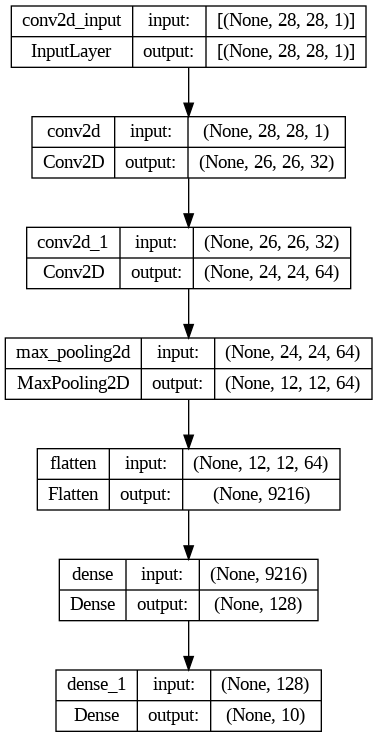

In [11]:
tf.keras.utils.plot_model(model=model, show_shapes=True)

###**Check if are using GPU or CPU**
if there is now GPU we will only see a CPU 

In [12]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 785226561343433676
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14385217536
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15638916807021258456
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


##**5.Select optimizer and Loss function**

In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

##**6.Train our model**
we use ```model.fit()``` and return it's value to history for later use

In [14]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    verbose=1,
                    validation_data=(X_dev, y_dev))

Epoch 1/10
938/938 [==============================] - 25s 9ms/step - loss: 1.9990 - accuracy: 0.4553 - val_loss: 1.2014 - val_accuracy: 0.7959
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.6403 - accuracy: 0.8452 - val_loss: 0.4063 - val_accuracy: 0.8881
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.3771 - accuracy: 0.8927 - val_loss: 0.3294 - val_accuracy: 0.9029
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3230 - accuracy: 0.9065 - val_loss: 0.2880 - val_accuracy: 0.9174
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2926 - accuracy: 0.9150 - val_loss: 0.2651 - val_accuracy: 0.9247
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2705 - accuracy: 0.9216 - val_loss: 0.2460 - val_accuracy: 0.9298
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2529 - accuracy: 0.9267 - val_loss: 0.2350 - val_accuracy: 0.9320
Epoc

In [15]:
score = model.evaluate(X_dev, y_dev)
print(f"Model Loss: {score[0]}]")
print(f"Model accuracy: {score[1]}]")

313/313 [==============================] - 1s 3ms/step - loss: 0.1961 - accuracy: 0.9433
Model Loss: 0.19608063995838165]
Model accuracy: 0.9433000087738037]


##**7.Plot loss and accuracy vs epochs**
we can access loss and accuracy using ```history.history``` which is save as ***dictionary***
- loss
- accuracy
- val_loss
- val_accuracy

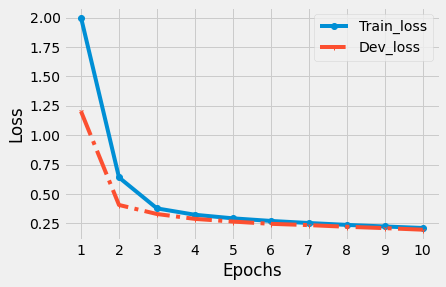

In [16]:
plt.style.use("fivethirtyeight")
train_loss  = history.history['loss']
dev_loss  = history.history['val_loss']

plt.plot(range(1, 11), train_loss, linestyle='-', marker='o', label='Train_loss')
plt.plot(range(1, 11), dev_loss, linestyle='-.', marker='1', label='Dev_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

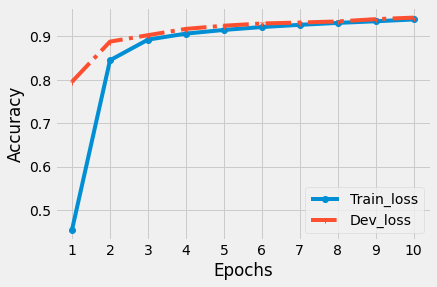

In [17]:
plt.style.use("fivethirtyeight")
train_accuracy  = history.history['accuracy']
dev_accuracy  = history.history['val_accuracy']

plt.plot(range(1, 11), train_accuracy, linestyle='-', marker='o', label='Train_loss')
plt.plot(range(1, 11), dev_accuracy, linestyle='-.', marker='1', label='Dev_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

##**8.Save and Load models**
use `.h5` format

In [19]:
model.save("MNIST_firstModelTensorflow.h5")
print("Model Saved")

from tensorflow.keras.models import load_model

classifier = load_model('MNIST_firstModelTensorflow.h5')

Model Saved


In [ ]:
pred = np.argmax(classifier.predict(X_dev), axis=-1)
y_dev = np.argmax(y_dev, axis=1)
accuracy = (np.sum(np.equal(y_dev, pred)) / len(pred)) * 100
print(f"Model Accuracy is: {accuracy}")

313/313 [==============================] - 1s 3ms/step
Model Accuracy is: 95.77


1/1 [==============================] - 0s 21ms/step


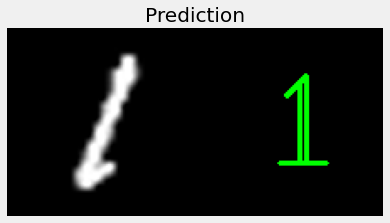

1/1 [==============================] - 0s 29ms/step


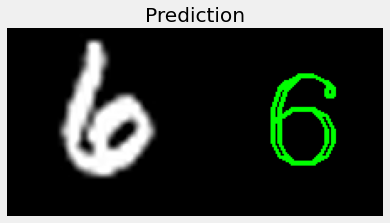

1/1 [==============================] - 0s 26ms/step


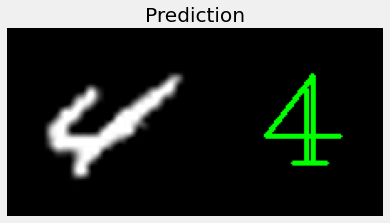

1/1 [==============================] - 0s 25ms/step


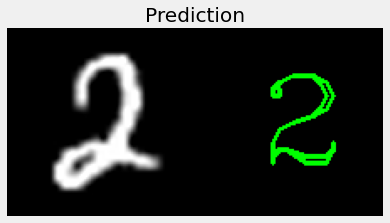

1/1 [==============================] - 0s 42ms/step


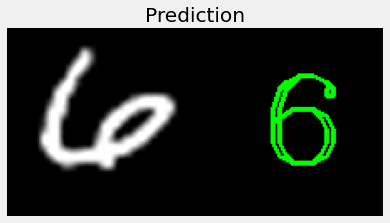

1/1 [==============================] - 0s 39ms/step


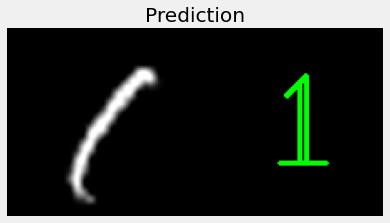

1/1 [==============================] - 0s 37ms/step


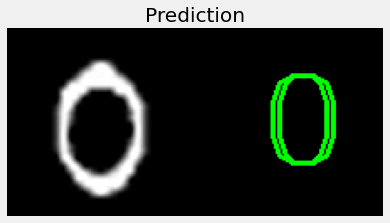

1/1 [==============================] - 0s 28ms/step


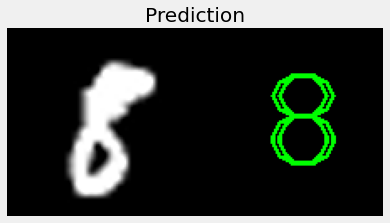

1/1 [==============================] - 0s 27ms/step


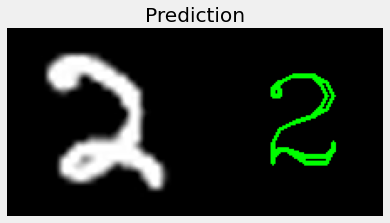

1/1 [==============================] - 0s 24ms/step


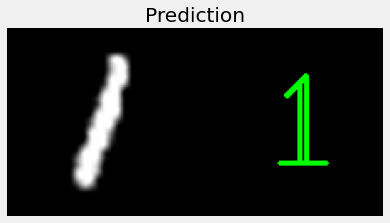

In [ ]:
import cv2
import numpy as np

# Reload our data since we rescaled it
(x_train, y_train), (x_dev, y_dev)  = MNIST.load_data()

def draw_test(name, pred, input_im):  
    '''Function that places the predicted class next to the original image'''
    # Create our black background
    BLACK = [0,0,0]
    # Expanded our original image to the left to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    plt.imshow(expanded_image)
    plt.title(name)
    plt.axis(False)
    plt.show()

for i in range(0,10):
    # Get a random data image from our test dataset 
    idx = np.random.randint(0,len(x_dev))
    input_im = x_dev[idx]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL)) 